In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb




# least squares support vector machine worked well

# linear discriminant analysis

# classification trees had best validation, naive bayes did better on training and marginally better 
# on validation


# Questions for josh - where and how to integrate cross validation, 'model agnostic'

In [3]:
df = pd.read_csv('training_data.csv') # header = 18382

In [4]:
pd.set_option('display.max_columns', 100)

## Data Exploration

In [4]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,28835,220000,2,1,2,36,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
1,25329,200000,2,3,2,29,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0
2,18894,180000,2,1,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,690,80000,1,2,2,32,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
4,6239,10000,1,2,2,27,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1


In [17]:
df['repay_status_sep'].value_counts() # -2 = 0

 0    11057
-1     4272
 1     2750
-2     2048
 2     2032
 3      239
 4       51
 5       20
 8       15
 6        9
 7        6
Name: repay_status_sep, dtype: int64

In [18]:
df['repay_status_aug'].value_counts()

 0    11804
-1     4526
 2     2967
-2     2813
 3      251
 4       70
 1       24
 5       19
 7       16
 6        8
 8        1
Name: repay_status_aug, dtype: int64

In [19]:
df['repay_status_jul'].value_counts()

 0    11823
-1     4464
-2     3024
 2     2891
 3      177
 4       58
 7       22
 6       19
 5       15
 1        4
 8        2
Name: repay_status_jul, dtype: int64

In [12]:
df.shape

(22499, 24)

In [14]:
df.isna().sum()

credit_given        0
gender              0
education           0
marital_status      0
age                 0
repay_status_sep    0
repay_status_aug    0
repay_status_jul    0
repay_status_jun    0
repay_status_may    0
repay_status_apr    0
bill_amt_sep        0
bill_amt_aug        0
bill_amt_jul        0
bill_amt_jun        0
bill_amt_may        0
bill_amt_apr        0
paid_amt_sep        0
paid_amt_aug        0
paid_amt_jul        0
paid_amt_jun        0
paid_amt_may        0
paid_amt_apr        0
default_status      0
dtype: int64

In [25]:
df.head()

,credit_given,gender,education,marital_status,age,repay_status_sep,repay_status_aug,repay_status_jul,repay_status_jun,repay_status_may,repay_status_apr,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,paid_amt_sep,paid_amt_aug,paid_amt_jul,paid_amt_jun,paid_amt_may,paid_amt_apr,default_status
0,220000,2,1,2,36,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
1,200000,2,3,2,29,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0
2,180000,2,1,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,80000,1,2,2,32,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
4,10000,1,2,2,27,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1


## Data Cleaning

In [5]:
df.drop(columns =['Unnamed: 0'], inplace = True)

In [6]:
df.drop(labels = 18381, axis = 0, inplace = True)

In [7]:
for col in df.columns:  # Converting all cols from type str to int
    df[col] = df[col].astype(int)

In [8]:
df.rename(columns = {'X1': 'credit_given', 'X2': 'gender', 'X3': 'education', 
                    'X4':'marital_status', 'X5':'age', 'X6':'repay_status_sep', 
                    'X7':'repay_status_aug', 'X8':'repay_status_jul', 
                    'X9':'repay_status_jun', 'X10':'repay_status_may', 
                    'X11':'repay_status_apr', 'X12':'bill_amt_sep', 
                    'X13':'bill_amt_aug', 'X14':'bill_amt_jul', 
                    'X15':'bill_amt_jun', 'X16':'bill_amt_may', 
                    'X17':'bill_amt_apr', 'X18':'paid_amt_sep',
                    'X19':'paid_amt_aug', 'X20':'paid_amt_jul',
                    'X21':'paid_amt_jun', 'X22':'paid_amt_may', 
                    'X23':'paid_amt_apr', 'Y':'default_status'}, inplace = True)

In [9]:
df['education'] = df['education'].apply(lambda x: 4 if x not in [1,2,3,4] else x)

In [10]:
df['marital_status'] = df['marital_status'].apply(lambda x: 3 if x not in [1,2,3] else x)

#### Dummy Experimentation

In [29]:
df_ohe = df

In [32]:
df_ohe = pd.get_dummies(df_ohe, columns = ['gender', 'education', 'marital_status', 'repay_status_sep', 
                                 'repay_status_aug', 'repay_status_jul', 'repay_status_jun', 
                                 'repay_status_may', 'repay_status_apr'])
df_ohe.head()

,credit_given,age,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,paid_amt_sep,paid_amt_aug,paid_amt_jul,paid_amt_jun,paid_amt_may,paid_amt_apr,default_status,gender_1,gender_2,education_1,education_2,education_3,education_4,marital_status_1,marital_status_2,marital_status_3,repay_status_sep_-2,repay_status_sep_-1,repay_status_sep_0,repay_status_sep_1,repay_status_sep_2,repay_status_sep_3,repay_status_sep_4,repay_status_sep_5,repay_status_sep_6,repay_status_sep_7,repay_status_sep_8,repay_status_aug_-2,repay_status_aug_-1,repay_status_aug_0,repay_status_aug_1,repay_status_aug_2,repay_status_aug_3,repay_status_aug_4,repay_status_aug_5,repay_status_aug_6,repay_status_aug_7,repay_status_aug_8,repay_status_jul_-2,repay_status_jul_-1,repay_status_jul_0,repay_status_jul_1,repay_status_jul_2,repay_status_jul_3,repay_status_jul_4,repay_status_jul_5,repay_status_jul_6,repay_status_jul_7,repay_status_jul_8,repay_status_jun_-2,repay_status_jun_-1,repay_status_jun_0,repay_status_jun_1,repay_status_jun_2,repay_status_jun_3,repay_status_jun_4,repay_status_jun_5,repay_status_jun_6,repay_status_jun_7,repay_status_jun_8,repay_status_may_-2,repay_status_may_-1,repay_status_may_0,repay_status_may_2,repay_status_may_3,repay_status_may_4,repay_status_may_5,repay_status_may_6,repay_status_may_7,repay_status_may_8,repay_status_apr_-2,repay_status_apr_-1,repay_status_apr_0,repay_status_apr_2,repay_status_apr_3,repay_status_apr_4,repay_status_apr_5,repay_status_apr_6,repay_status_apr_7,repay_status_apr_8
0,220000,36,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,200000,29,326,326,326,326,326,326,326,326,326,326,326,326,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,180000,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,80000,32,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,10000,27,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## EDA

C:\Users\David\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

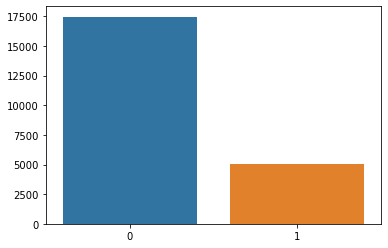

In [47]:
sns.barplot(df['default_status'].value_counts().index, df['default_status'].value_counts().values)

In [63]:
pp_drop_list = ['repay_status_sep', 'repay_status_aug',
                                       'repay_status_jul', 'repay_status_jun', 
                                       'repay_status_may', 'repay_status_apr', 
                                       'marital_status', 'gender', 'education',
                                        'default_status']

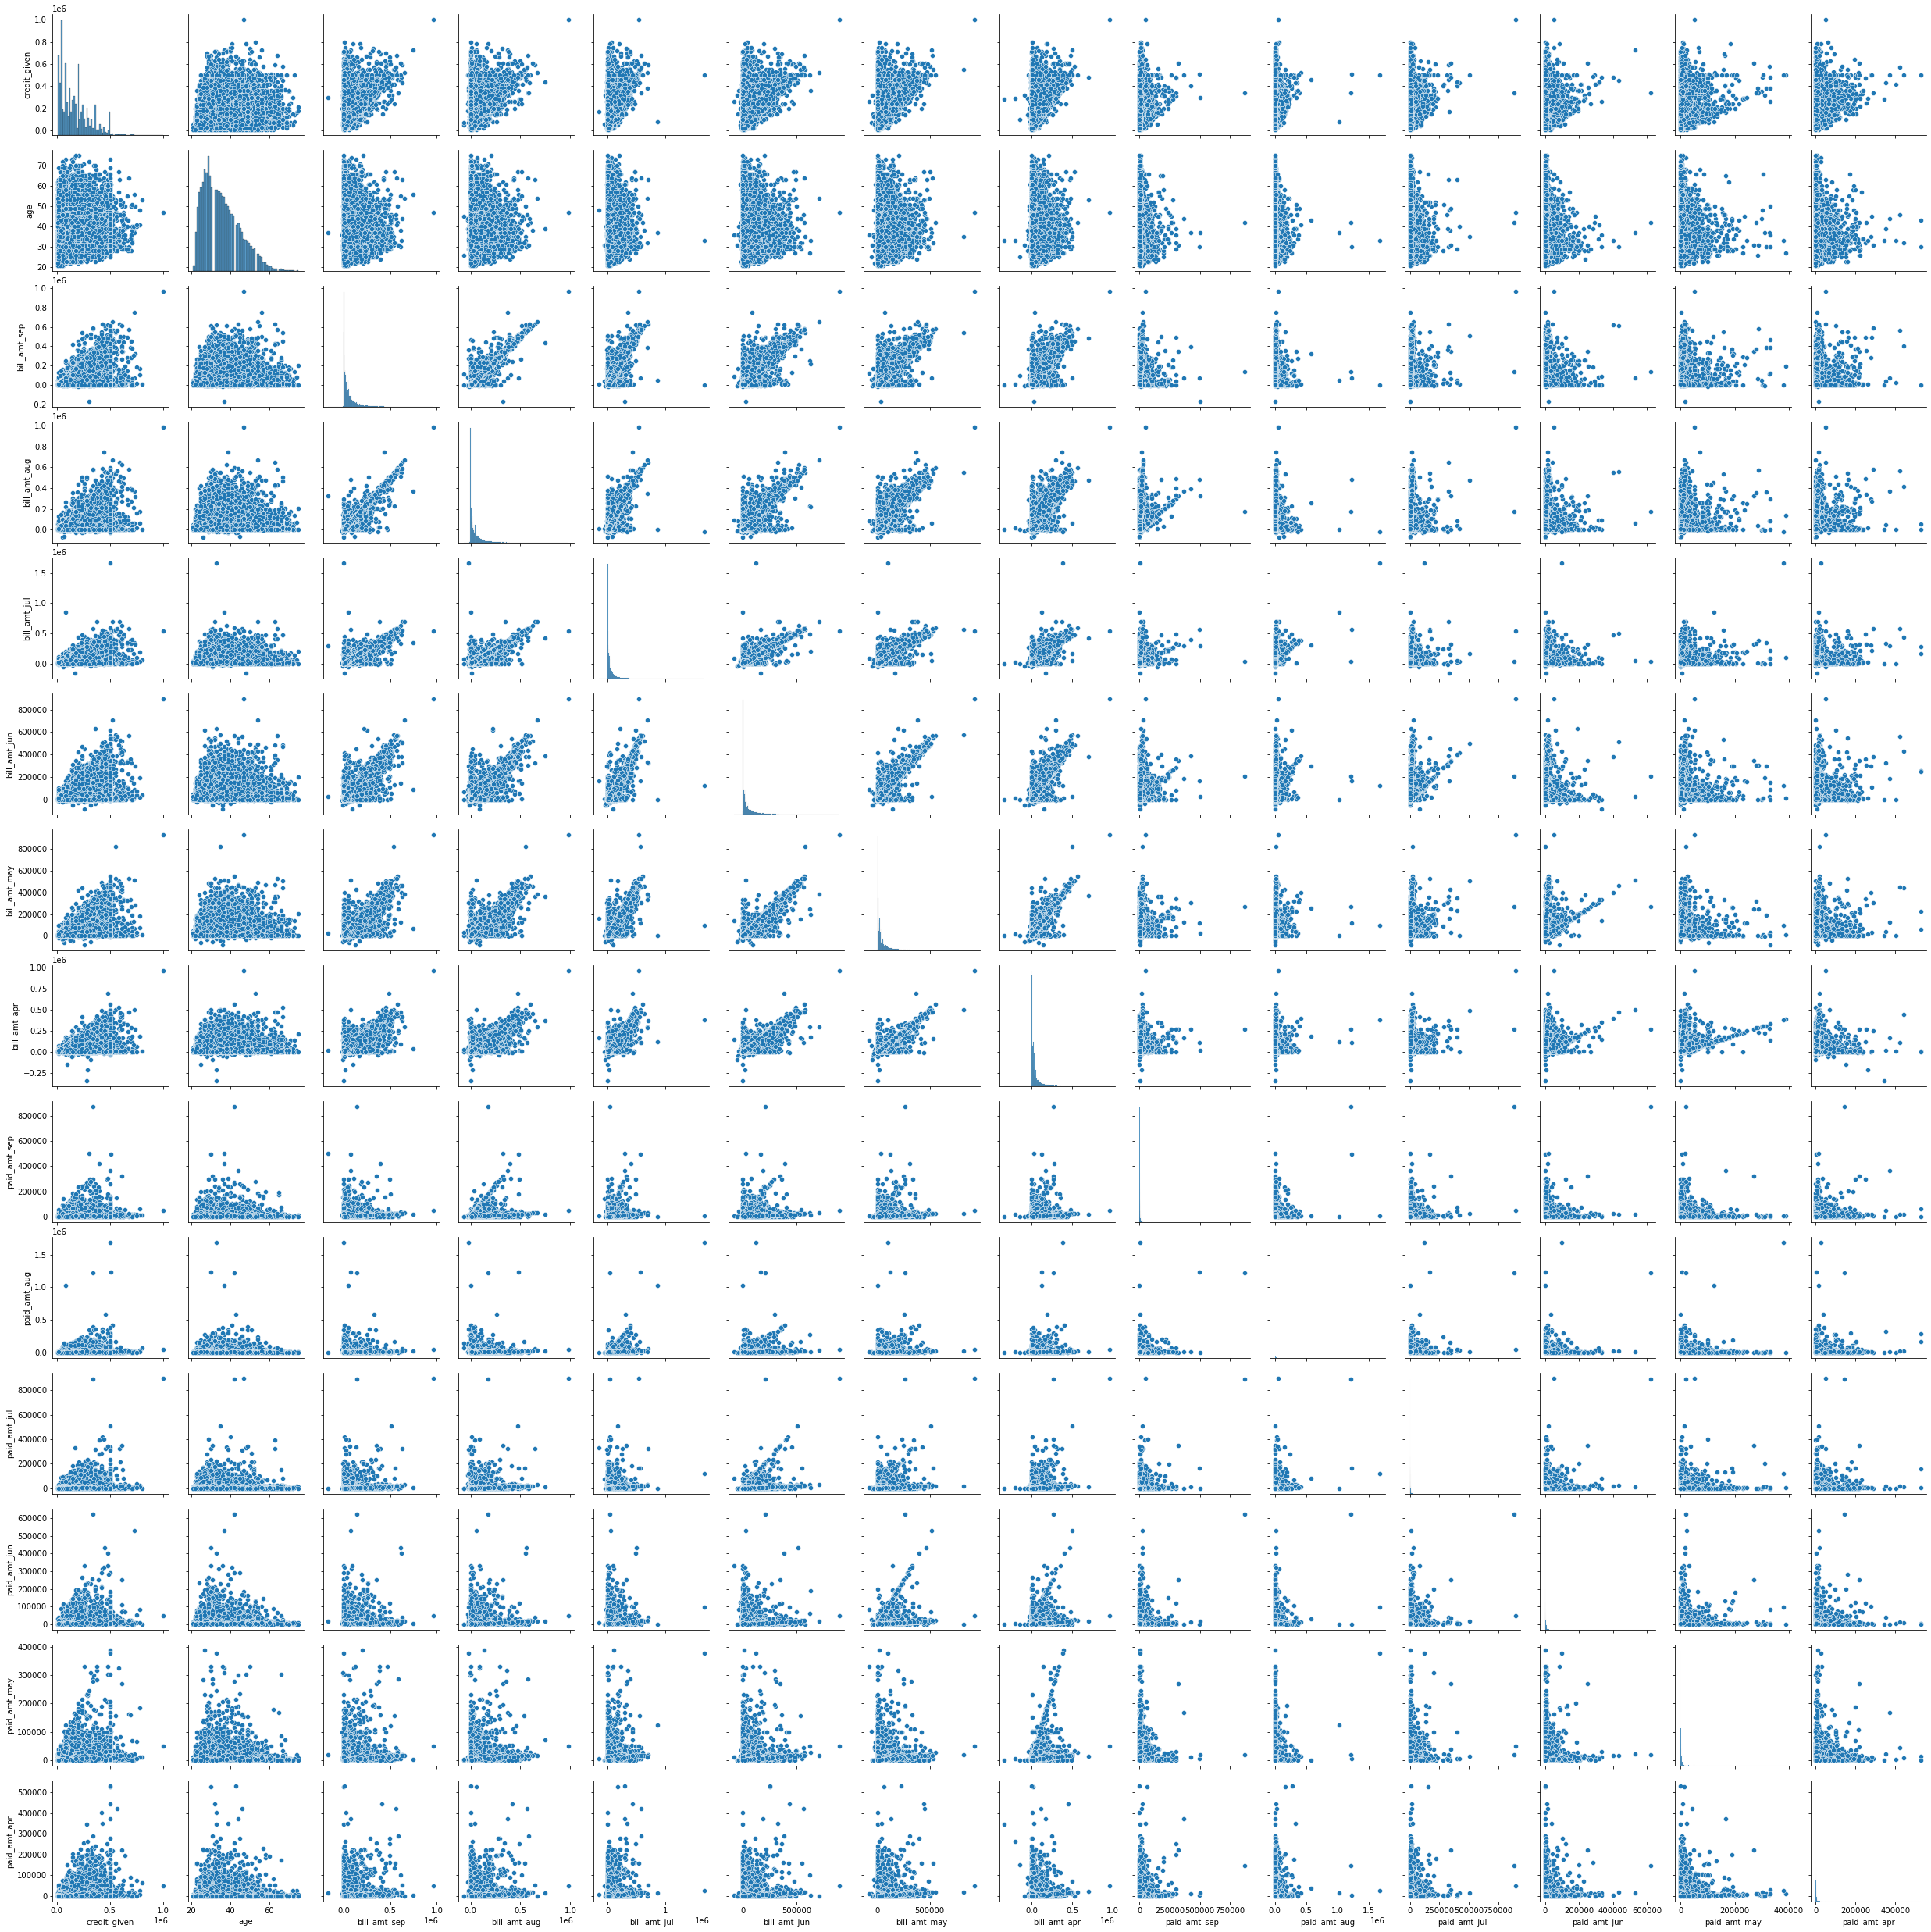

In [54]:
sns.pairplot(data = df.drop(columns = pp_drop_list))

## Feature Engineering

In [ ]:
get dummies for education marriage 

## Feature Selection

## Modeling and Hyperparameter Tuning

### Logistic Regression

In [49]:
X_lr = df[df.columns[:-1]]
y_lr = df['default_status']

In [50]:
# for col in X_lr.columns:
#     X_lr[col] = (X_lr[col] - min(X_lr[col]))/(max(X_lr[col] - min(X_lr[col])))
# X_lr.head()

# Normalizing

In [51]:
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, random_state = 1)

In [52]:
scaler = StandardScaler()
scaler.fit_transform(X_lr_train)
scaler.fit(X_lr_test)

StandardScaler()

In [53]:
logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver = 'liblinear')
log_model = logreg.fit(X_lr_train, y_lr_train)
log_model

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [54]:
y_hat_lr_train = log_model.predict(X_lr_train)
y_hat_lr_test = log_model.predict(X_lr_test)

### KNN

In [55]:
X_knn = df[df.columns[:-1]]
y_knn = df['default_status']

In [56]:
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y_knn, random_state = 1)

In [57]:
scaler = StandardScaler()
scaler.fit_transform(X_knn_train)
scaler.fit(X_knn_test)

StandardScaler()

In [58]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_knn_train, y_knn_train)
knn

KNeighborsClassifier(n_neighbors=9)

In [59]:
y_hat_knn_train = knn.predict(X_knn_train)
y_hat_knn_test = knn.predict(X_knn_test)

### Decsion Tree

In [60]:
X_dt = df[df.columns[:-1]]
y_dt = df['default_status']

In [72]:
X_dt = df_ohe.drop(columns = ['default_status']) # dummied
y_dt = df_ohe['default_status']

In [73]:
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y_dt, random_state = 1)

In [74]:
scaler = StandardScaler()
scaler.fit_transform(X_dt_train)
scaler.fit(X_dt_test)

StandardScaler()

In [75]:
dt = DecisionTreeClassifier(max_depth = 6)
dt.fit(X_dt_train, y_dt_train)
dt

DecisionTreeClassifier(max_depth=6)

In [76]:
y_hat_dt_train = dt.predict(X_dt_train)
y_hat_dt_test = dt.predict(X_dt_test)

### Decsion Tree 2

In [119]:
X_dt = df[df.columns[:-1]]
y_dt = df['default_status']

In [113]:
X_dt = df_ohe.drop(columns = ['default_status']) # dummied
y_dt = df_ohe['default_status']

In [120]:
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y_dt, random_state = 1)

In [121]:
scaler = StandardScaler()
scaler.fit_transform(X_dt_train)
scaler.fit(X_dt_test)

StandardScaler()

In [122]:
dt = DecisionTreeClassifier(class_weight = 'balanced',
                           criterion = 'entropy',
                           max_depth = 3,
                           max_leaf_nodes = 20,
                           min_samples_split = 2,
                           min_samples_leaf = 1,
                           splitter = 'best'
                           )
dt.fit(X_dt_train, y_dt_train)
dt

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, max_leaf_nodes=20)

In [123]:
y_hat_dt_train = dt.predict(X_dt_train)
y_hat_dt_test = dt.predict(X_dt_test)

### Voting Classifier Ensemble of LR, KNN, DT

In [65]:
X_lkd = df[df.columns[:-1]]
y_lkd = df['default_status']

In [66]:
X_lkd = df_ohe.drop(columns = ['default_status']) # dummied
y_lkd = df_ohe['default_status']

In [67]:
X_lkd_train, X_lkd_test, y_lkd_train, y_lkd_test = train_test_split(X_lkd, y_lkd, random_state = 1)

In [68]:
scaler = StandardScaler()
scaler.fit_transform(X_lkd_train)
scaler.fit(X_lkd_test)

StandardScaler()

In [69]:
lkd_voting_classifier = VotingClassifier(
                    estimators = [('logreg', log_model), ('knneighbors', knn), ('decisiontree',dt)], 
                    voting = 'soft',
                    verbose = True,
                    n_jobs = -1)
lkd_voting_classifier.fit(X_lkd_train, y_lkd_train)
lkd_voting_classifier

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=1000000000000.0,
                                                 fit_intercept=False,
                                                 solver='liblinear')),
                             ('knneighbors',
                              KNeighborsClassifier(n_neighbors=9)),
                             ('decisiontree',
                              DecisionTreeClassifier(max_depth=6))],
                 n_jobs=-1, verbose=True, voting='soft')

In [70]:
y_hat_lkd_train = lkd_voting_classifier.predict(X_lkd_train)
y_hat_lkd_test = lkd_voting_classifier.predict(X_lkd_test)

### Random Forest

In [19]:
X_rf = df[df.columns[:-1]]
y_rf = df['default_status']

In [39]:
X_rf = df_ohe.drop(columns = ['default_status']) # dummied
y_rf = df_ohe['default_status']

In [40]:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, random_state = 1)

In [41]:
scaler = StandardScaler()
scaler.fit_transform(X_rf_train)
scaler.fit(X_rf_test)

StandardScaler()

In [42]:
rf = RandomForestClassifier()
rf.fit(X_rf_train, y_rf_train)
rf

RandomForestClassifier()

In [43]:
y_hat_rf_train = rf.predict(X_rf_train)
y_hat_rf_test = rf.predict(X_rf_test)

### GridSearch Random Forest

In [97]:
X_gsrf = df[df.columns[:-1]]
y_gsrf = df['default_status']

In [98]:
X_gsrf_train, X_gsrf_test, y_gsrf_train, y_gsrf_test = train_test_split(X_gsrf, 
                                                                        y_gsrf, 
                                                                        random_state = 1)

In [99]:
scaler = StandardScaler()
scaler.fit_transform(X_gsrf_train)
scaler.fit(X_gsrf_test)

StandardScaler()

In [103]:
rf_param_grid = {'n_estimators': [75, 100, 300, 500, 700, 1000],
                 'criterion': ['gini', 'entropy'],
                 'max_depth': range(3,10),
                 'max_features': range(4, 9),
}

In [104]:
gridsearch_rf = GridSearchCV(estimator = RandomForestClassifier(),
                            param_grid = rf_param_grid,
                            cv = 5,
                            scoring = 'f1',
                            n_jobs = -1,
                            verbose = True) 
gridsearch_rf.fit(X_gsrf_train, y_gsrf_train)
gridsearch_rf

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed: 54.8min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 10), 'max_features': range(4, 9),
                         'n_estimators': [75, 100, 300, 500, 700, 1000]},
             scoring='f1', verbose=True)

In [109]:
y_hat_gsrf_train = gridsearch_rf.best_estimator_.predict(X_gsrf_train)
y_hat_gsrf_test = gridsearch_rf.best_estimator_.predict(X_gsrf_test)

### Bagged Forest

### Vanilla XGBoost

In [78]:
X_xg = df[df.columns[:-1]] # not dummied
y_xg = df['default_status']

In [33]:
X_xg = df_ohe.drop(columns = ['default_status']) # dummied
y_xg = df_ohe['default_status']

In [79]:
X_xg_train, X_xg_test, y_xg_train, y_xg_test = train_test_split(X_xg, y_xg, random_state = 1)

In [80]:
scaler = StandardScaler()
scaler.fit_transform(X_xg_train)
scaler.fit(X_xg_test)

StandardScaler()

In [81]:
xgb_vanilla = xgb.XGBClassifier()
xgb_vanilla.fit(X_xg_train, y_xg_train)
xgb_vanilla

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
y_hat_xg_train = xgb_vanilla.predict(X_xg_train)
y_hat_xg_test = xgb_vanilla.predict(X_xg_test)

### K Fold XGB

In [78]:
X_xg = df[df.columns[:-1]] # not dummied
y_xg = df['default_status']

In [33]:
X_xg = df_ohe.drop(columns = ['default_status']) # dummied
y_xg = df_ohe['default_status']

In [79]:
X_xg_train, X_xg_test, y_xg_train, y_xg_test = train_test_split(X_xg, y_xg, random_state = 1)

In [80]:
scaler = StandardScaler()
scaler.fit_transform(X_xg_train)
scaler.fit(X_xg_test)

StandardScaler()

In [97]:
def modelfit(alg, dtrain, predictors, target, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(dtrain[target].values, dtrain_predictions))
    print("F1 : %.4g" % f1_score(dtrain[target].values, dtrain_predictions))

    return alg

In [94]:
train  = pd.concat([X_xg_train, y_xg_train], axis=1)
target = 'default_status'
IDcol = df.index

In [95]:
train.head()

,credit_given,gender,education,marital_status,age,repay_status_sep,repay_status_aug,repay_status_jul,repay_status_jun,repay_status_may,repay_status_apr,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,paid_amt_sep,paid_amt_aug,paid_amt_jul,paid_amt_jun,paid_amt_may,paid_amt_apr,default_status
19026,200000,2,1,2,29,-1,-1,0,0,0,-2,2704,4959,5800,6000,0,0,4959,1000,200,0,0,0,0
15439,80000,2,1,2,24,-1,2,-1,-1,-1,-1,1275,887,890,382,2786,2557,2,893,382,2794,2561,77004,0
1123,400000,1,1,1,30,0,0,0,0,0,-2,12820,15463,50040,22072,6712,5286,5427,37505,10077,233,5312,6991,0
6396,110000,1,2,1,55,0,0,0,0,0,0,106670,108727,107386,78268,75846,75685,6000,3300,3012,3008,3000,3069,0
19719,20000,2,3,1,51,1,-1,-1,-1,-2,-2,0,780,340,-50,-830,-1660,780,340,0,0,0,0,0


In [98]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in target]
xgb1 = xgb.XGBClassifier(learning_rate =0.1,
                         n_estimators=1000,
                         max_depth=3,
                         min_child_weight=1,
                         gamma=0,
                         subsample=0.6,
                         colsample_bytree=0.3,
                         objective= 'binary:logistic',
                         nthread=4,
                         scale_pos_weight=1,
                         seed=27)

alg = modelfit(xgb1, train, predictors, target)


Model Report
Accuracy : 0.8265
F1 : 0.4914


### GridSearch XGBoost

In [125]:
X_gsxg = df[df.columns[:-1]] # not dummied
y_gsxg = df['default_status']

In [126]:
X_gsxg = df_ohe.drop(columns = ['default_status']) # dummied
y_gsxg = df_ohe['default_status']

In [127]:
X_gsxg_train, X_gsxg_test, y_gsxg_train, y_gsxg_test = train_test_split(X_gsxg, y_gsxg, 
                                                                        random_state = 1)

In [128]:
scaler = StandardScaler()
scaler.fit_transform(X_gsxg_train)
scaler.fit(X_gsxg_test)

StandardScaler()

In [134]:
xg_param_grid = {'n_estimators': [300, 500, 700],
                 'learning_rate': [.2, .1, .05], 
                 'max_depth': [3, 4, 5, 6, 7],
                 'colsample_bytree': [.7, .5, .45],
                 'min_child_weight': [1,2,4],
#                  'gamma': [0, .1]
                }

In [135]:
gridsearch_xg = GridSearchCV(xgb.XGBClassifier(objective = 'binary:logistic'),
                             param_grid = xg_param_grid,
                             scoring = 'f1',
                             n_jobs = -1,
                             verbose = 1,
                             cv = 5
                            )
gridsearch_xg.fit(X_gsxg_train, y_gsxg_train)
gridsearch_xg

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 20.3min


KeyboardInterrupt: 

## Model Evaluation

### Logistic Regression

In [82]:
print('Y_hat_lr_train F1 score: ', f1_score(y_lr_train, y_hat_lr_train),'\n'+
      'Y_hat_lr_test F1 score: ', f1_score(y_lr_test, y_hat_lr_test),'\n')

print('Y_hat_lr_train precision: ', precision_score(y_lr_train, y_hat_lr_train),'\n'+
      'Y_hat_lr_test precision: ', precision_score(y_lr_test, y_hat_lr_test),'\n')

print('Y_hat_lr_train recall: ', recall_score(y_lr_train, y_hat_lr_train),'\n'+
      'Y_hat_lr_test recall: ', recall_score(y_lr_test, y_hat_lr_test))

Y_hat_lr_train F1 score:  0.3644637910565889 
Y_hat_lr_test F1 score:  0.37727006444053895 

Y_hat_lr_train precision:  0.7122969837587007 
Y_hat_lr_test precision:  0.7318181818181818 

Y_hat_lr_train recall:  0.24488168040414784 
Y_hat_lr_test recall:  0.2541436464088398


### KNN

In [81]:
print('Y_hat_knn_train F1 score: ', f1_score(y_knn_train, y_hat_knn_train),'\n'+
      'Y_hat_knn_test F1 score: ', f1_score(y_knn_test, y_hat_knn_test),'\n')

print('Y_hat_lr_train precision: ', precision_score(y_knn_train, y_hat_knn_train),'\n'+
      'Y_hat_lr_test precision: ', precision_score(y_knn_test, y_hat_knn_test),'\n')

print('Y_hat_lr_train recall: ', recall_score(y_knn_train, y_hat_knn_train),'\n'+
      'Y_hat_lr_test recall: ', recall_score(y_knn_test, y_hat_knn_test))

Y_hat_knn_train F1 score:  0.33268101761252444 
Y_hat_knn_test F1 score:  0.21924198250728863 

Y_hat_lr_train precision:  0.6300963676797627 
Y_hat_lr_test precision:  0.41964285714285715 

Y_hat_lr_train recall:  0.22600372241425154 
Y_hat_lr_test recall:  0.1483820047355959


### Decsion Tree

In [124]:
print('Y_hat_dt_train F1 score: ', f1_score(y_dt_train, y_hat_dt_train),'\n'+
      'Y_hat_dt_test F1 score: ', f1_score(y_dt_test, y_hat_dt_test),'\n')

print('Y_hat_dt_train precision: ', precision_score(y_dt_train, y_hat_dt_train),'\n'+
      'Y_hat_dt_test precision: ', precision_score(y_dt_test, y_hat_dt_test),'\n')

print('Y_hat_dt_train recall: ', recall_score(y_dt_train, y_hat_dt_train),'\n'+
      'Y_hat_dt_test recall: ', recall_score(y_dt_test, y_hat_dt_test))

# MaxDepth of 4 yields .49414 f1
# MaxDepth of 5 yields .49797 f1
# MaxDepth of 6 yields .49826 f1
# MaxDepth of 7 made it go back down again, should use GridSearch

# not dummied .51856 best

Y_hat_dt_train F1 score:  0.518679807471923 
Y_hat_dt_test F1 score:  0.5185694635488308 

Y_hat_dt_train precision:  0.4557905337361531 
Y_hat_dt_test precision:  0.45947592931139547 

Y_hat_dt_train recall:  0.6017016750864131 
Y_hat_dt_test recall:  0.5951065509076559


### Ensemble of LR, KNN, DT

In [71]:
print('Y_hat_lkd_train F1 score: ', f1_score(y_lkd_train, y_hat_lkd_train),'\n'+
      'Y_hat_lkd_test F1 score: ', f1_score(y_lkd_test, y_hat_lkd_test),'\n')

print('Y_hat_lkd_train precision: ', precision_score(y_lkd_train, y_hat_lkd_train),'\n'+
      'Y_hat_lkd_test precision: ', precision_score(y_lkd_test, y_hat_lkd_test),'\n')

print('Y_hat_lkd_train recall: ', recall_score(y_lkd_train, y_hat_lkd_train),'\n'+
      'Y_hat_lkd_test recall: ', recall_score(y_lkd_test, y_hat_lkd_test))

Y_hat_lkd_train F1 score:  0.2410080183276059 
Y_hat_lkd_test F1 score:  0.18307905686546463 

Y_hat_lkd_train precision:  0.8708609271523179 
Y_hat_lkd_test precision:  0.7542857142857143 

Y_hat_lkd_train recall:  0.13985642116458388 
Y_hat_lkd_test recall:  0.10418310970797158


###  Vanilla Random Forest

In [44]:
print('Y_hat_rf_train F1 score: ', f1_score(y_rf_train, y_hat_rf_train),'\n'+
      'Y_hat_rf_test F1 score: ', f1_score(y_rf_test, y_hat_rf_test),'\n')

print('Y_hat_rf_train precision: ', precision_score(y_rf_train, y_hat_rf_train),'\n'+
      'Y_hat_rf_test precision: ', precision_score(y_rf_test, y_hat_rf_test),'\n')

print('Y_hat_rf_train recall: ', recall_score(y_rf_train, y_hat_rf_train), '\n' +
      'Y_hat_rf_test recall: ', recall_score(y_rf_test, y_hat_rf_test))

Y_hat_rf_train F1 score:  0.999069272703098 
Y_hat_rf_test F1 score:  0.467741935483871 

Y_hat_rf_train precision:  0.9992021276595745 
Y_hat_rf_test precision:  0.6471408647140865 

Y_hat_rf_train recall:  0.9989364530709918 
Y_hat_rf_test recall:  0.36621941594317287


### GridSearch Random Forest

In [108]:
print('Best Score:', gridsearch_rf.best_score_)
print('Best Parameters:', gridsearch_rf.best_params_)
print('Best Estimator:', gridsearch_rf.best_estimator_)

Best Score: 0.4707519451337866
Best Parameters: {'criterion': 'gini', 'max_depth': 9, 'max_features': 6, 'n_estimators': 75}
Best Estimator: RandomForestClassifier(max_depth=9, max_features=6, n_estimators=75)


In [111]:
print('Y_hat_gsrf_train F1 score: ', f1_score(y_gsrf_train, y_hat_gsrf_train),'\n'+
      'Y_hat_gsrf_test F1 score: ', f1_score(y_gsrf_test, y_hat_gsrf_test),'\n')

print('Y_hat_gsrf_train precision: ', precision_score(y_gsrf_train, y_hat_gsrf_train),'\n'+
      'Y_hat_gsrf_test precision: ', precision_score(y_gsrf_test, y_hat_gsrf_test),'\n')

print('Y_hat_gsrf_train recall: ', recall_score(y_gsrf_train, y_hat_gsrf_train), '\n' +
      'Y_hat_gsrf_test recall: ', recall_score(y_gsrf_test, y_hat_gsrf_test))

Y_hat_gsrf_train F1 score:  0.5808341951051361 
Y_hat_gsrf_test F1 score:  0.4832904884318765 

Y_hat_gsrf_train precision:  0.8255756981871631 
Y_hat_gsrf_test precision:  0.6932153392330384 

Y_hat_gsrf_train recall:  0.44801914384472213 
Y_hat_gsrf_test recall:  0.3709550118389897


### Bagged Forest

### Vanilla XGBoost

In [83]:
print('Y_hat_xg_train F1 score: ', f1_score(y_xg_train, y_hat_xg_train),'\n'+
      'Y_hat_xg_test F1 score: ', f1_score(y_xg_test, y_hat_xg_test),'\n')

print('Y_hat_xg_train precision: ', precision_score(y_xg_train, y_hat_xg_train),'\n'+
      'Y_hat_xg_test precision: ', precision_score(y_xg_test, y_hat_xg_test),'\n')

print('Y_hat_xg_train recall: ', recall_score(y_xg_train, y_hat_xg_train), '\n' +
      'Y_hat_xg_test recall: ', recall_score(y_xg_test, y_hat_xg_test))

# Vanilla Dummied f1 .47756

Y_hat_xg_train F1 score:  0.7294344473007712 
Y_hat_xg_test F1 score:  0.4726166328600406 

Y_hat_xg_train precision:  0.9216402760860739 
Y_hat_xg_test precision:  0.6609929078014184 

Y_hat_xg_train recall:  0.6035628822121776 
Y_hat_xg_test recall:  0.36779794790844517


## Final Analysis and Model